###Variable	Definition	Key



- Survived	Survival	0 = No, 1 = Yes
- Pclass	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
- Sex	Sex
- Age	Age in years
- Sibsp	# of siblings / spouses aboard the Titanic
- Parch	# of parents / children aboard the Titanic
- Ticket	Ticket number
- Fare	Passenger fare
- Cabin	Cabin number
- Embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown,S = Southampton


* Our goal is to predict whether a passenger survived or not. So our target variable is survived

#Import Libraries and Data

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import recall_score, f1_score, roc_curve, auc

In [ ]:
# Load the Titanic dataset
df = sns.load_dataset('titanic')

##View Data

In [ ]:
# Print the first few rows of the dataset
df.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


###Data Shape

In [ ]:
df.shape

(891, 15)

###Missing Values

In [ ]:
df.isnull().sum() #null

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

* The missing values in the **deck** column is 77% of the dataset. The **deck** column is going to be dropped.

* The **age** column is going to dropped because it is trying to replace the missing values (20% of the dataset) may cause of misrepresentation of the data.

* Dropping **embark_town** because it is already represented in **embarked** column.

* Dropping **alive** because it is already represented in **survived** column.

* For **adult_male** column; it is a boolean
* For **who** column; changing to categorical variable
* For **sex** column; mapping 1 to female and 0 to male
* For **alone** column;  it is a boolean
* Dropping **class** because it is already represented in **pclass** column
* Keeping **fare** column as numerical representation of **pclass** in model building, but **pclass** will be used in EDA analysis
* Keeping **parch** because it is logical to assume parents may play a role in the survival rate
* Keeping **sibsp** because it is logical to assume siblings may play a role in the survival rate
* Our target columng is **survived**.
* Changing **embarked** to category

In [ ]:
#Dropping said columns
df = df.drop(['age', 'deck', 'embark_town', 'alive', 'class'], axis=1)


In [ ]:
#Check Data Types to make sure all is in order
df.dtypes

survived        int64
pclass          int64
sex            object
sibsp           int64
parch           int64
fare          float64
embarked       object
who            object
adult_male       bool
alone            bool
dtype: object

In [ ]:
# Change 'adult_male' column: True to 1, False to 0
#df['adult_male'] = df['adult_male'].map({True: 1, False: 0})

# Change 'sex' column: 'female' to 1, 'male' to 0
df['sex'] = df['sex'].map({'female': 1, 'male': 0})

# Change 'alone' column: True to 1, False to 0
#df['alone'] = df['alone'].map({True: 1, False: 0})

# Optionally, you can ensure the data types are integers if they are not already
#df['adult_male'] = df['adult_male'].astype(int)
df['sex'] = df['sex'].astype('category')
df['who'] = df['who'].astype('category')
df['embarked'] = df['embarked'].astype('category')
df['pclass'] = df['pclass'].astype('category')
#df['alone'] = df['alone'].astype(int)


In [ ]:
df.dtypes

survived         int64
pclass        category
sex           category
sibsp            int64
parch            int64
fare           float64
embarked      category
who           category
adult_male        bool
alone             bool
dtype: object

In [ ]:
df.head(10)

,survived,pclass,sex,sibsp,parch,fare,embarked,who,adult_male,alone
0,0,3,0,1,0,7.2500,S,man,True,False
1,1,1,1,1,0,71.2833,C,woman,False,False
2,1,3,1,0,0,7.9250,S,woman,False,True
3,1,1,1,1,0,53.1000,S,woman,False,False
4,0,3,0,0,0,8.0500,S,man,True,True
5,0,3,0,0,0,8.4583,Q,man,True,True
6,0,1,0,0,0,51.8625,S,man,True,True
7,0,3,0,3,1,21.0750,S,child,False,False
8,1,3,1,0,2,11.1333,S,woman,False,False
9,1,2,1,1,0,30.0708,C,child,False,False


In [ ]:
df.shape

(891, 10)

Data has decreased from 15 columns to 10 columns. Columns dropped were:

1. age
2. deck
3. embark_town
4. alive
5. class

# Univariate, Bivariate, and Multivariate analysis

#Univariate

## Basic histogram

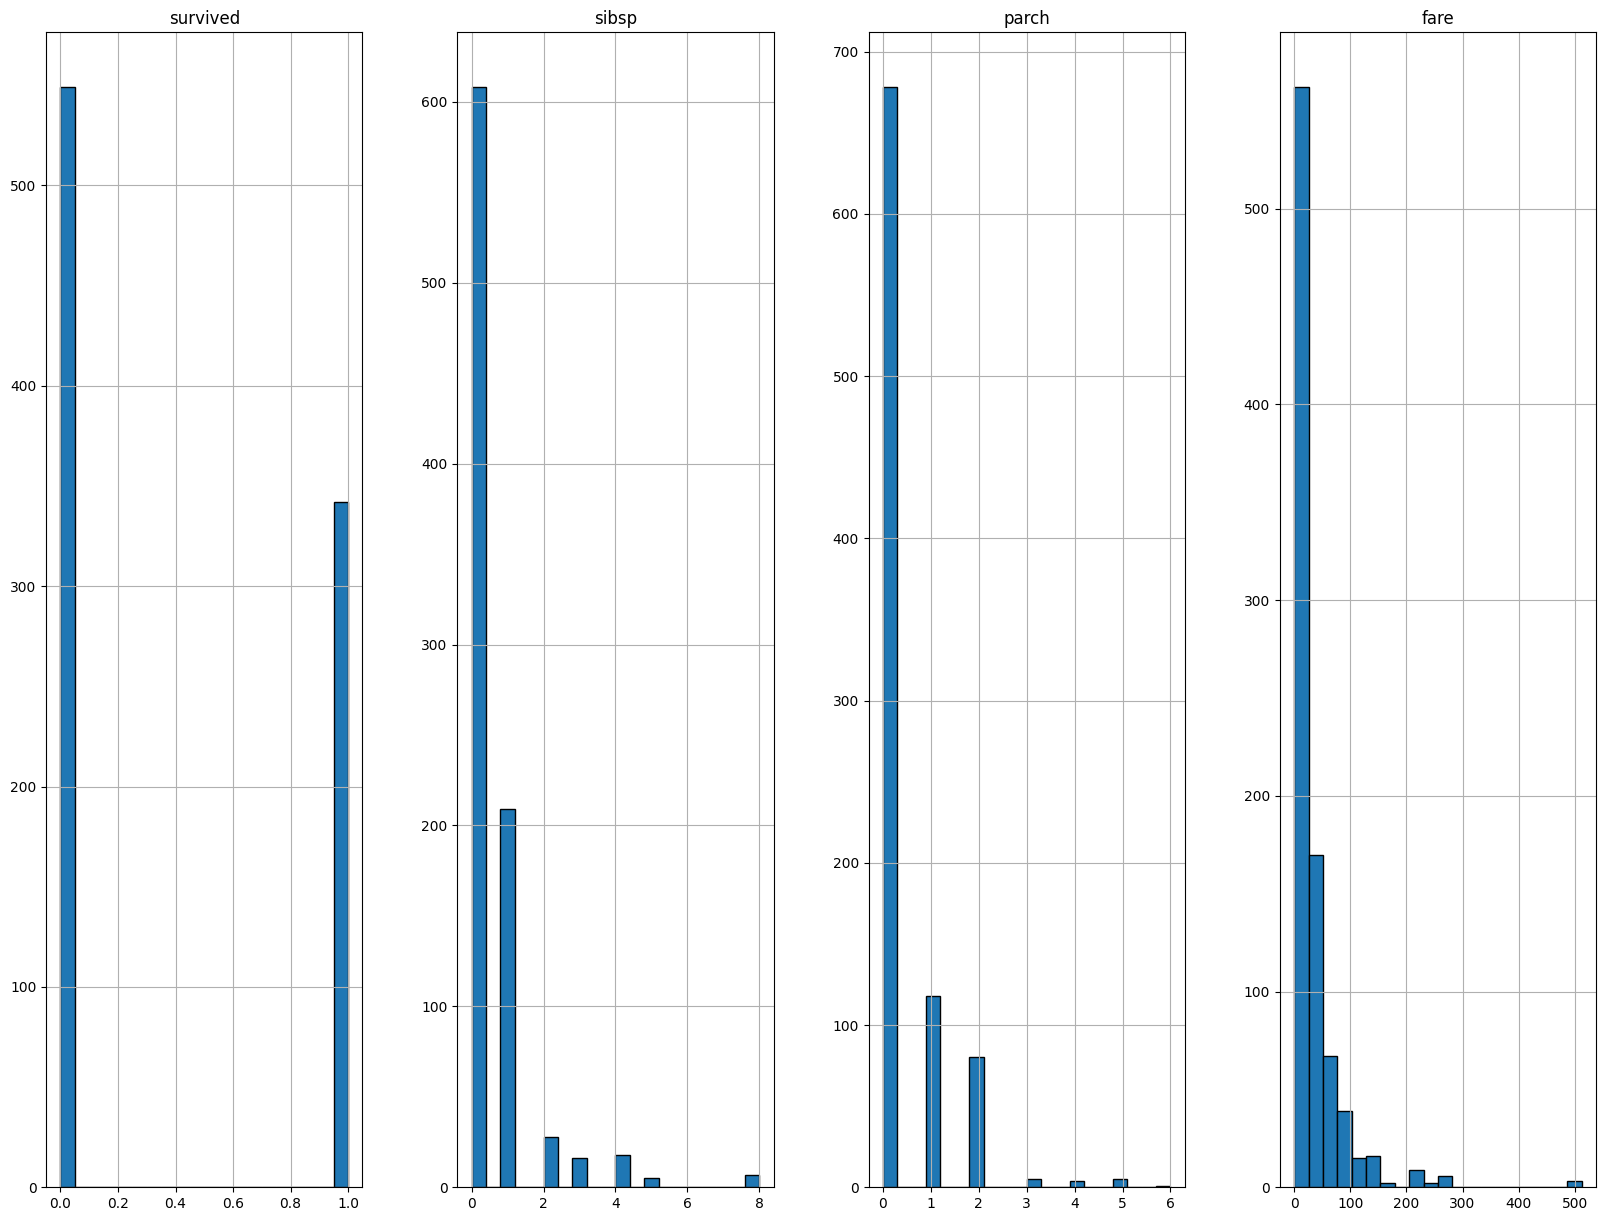

In [ ]:

# Plot histograms for all columns
df.hist(bins=20, figsize=(20, 15), layout=(-1, 4), edgecolor='black')

plt.subplots_adjust(hspace=0.5, wspace=0.3)
plt.show()


In [ ]:
# Count the values in the 'survived' column
value_counts = df['survived'].value_counts()

# Print the counts
print(value_counts)


# Count the values in the 'pclass' column
value_counts1 = df['pclass'].value_counts()

# Print the counts
print(value_counts1)

# Count the values in the 'sex' column
value_counts2 = df['sex'].value_counts()

# Print the counts
print(value_counts2)



0    549
1    342
Name: survived, dtype: int64
3    491
1    216
2    184
Name: pclass, dtype: int64
0    577
1    314
Name: sex, dtype: int64


####Histogram Insights

* Not Survive -      549
* Survived -         342
>
>
* Third Class -      491
* First Class -      216
* Second Class -     184
>
>
* Male -    577
* Female -    314


##Boxplots

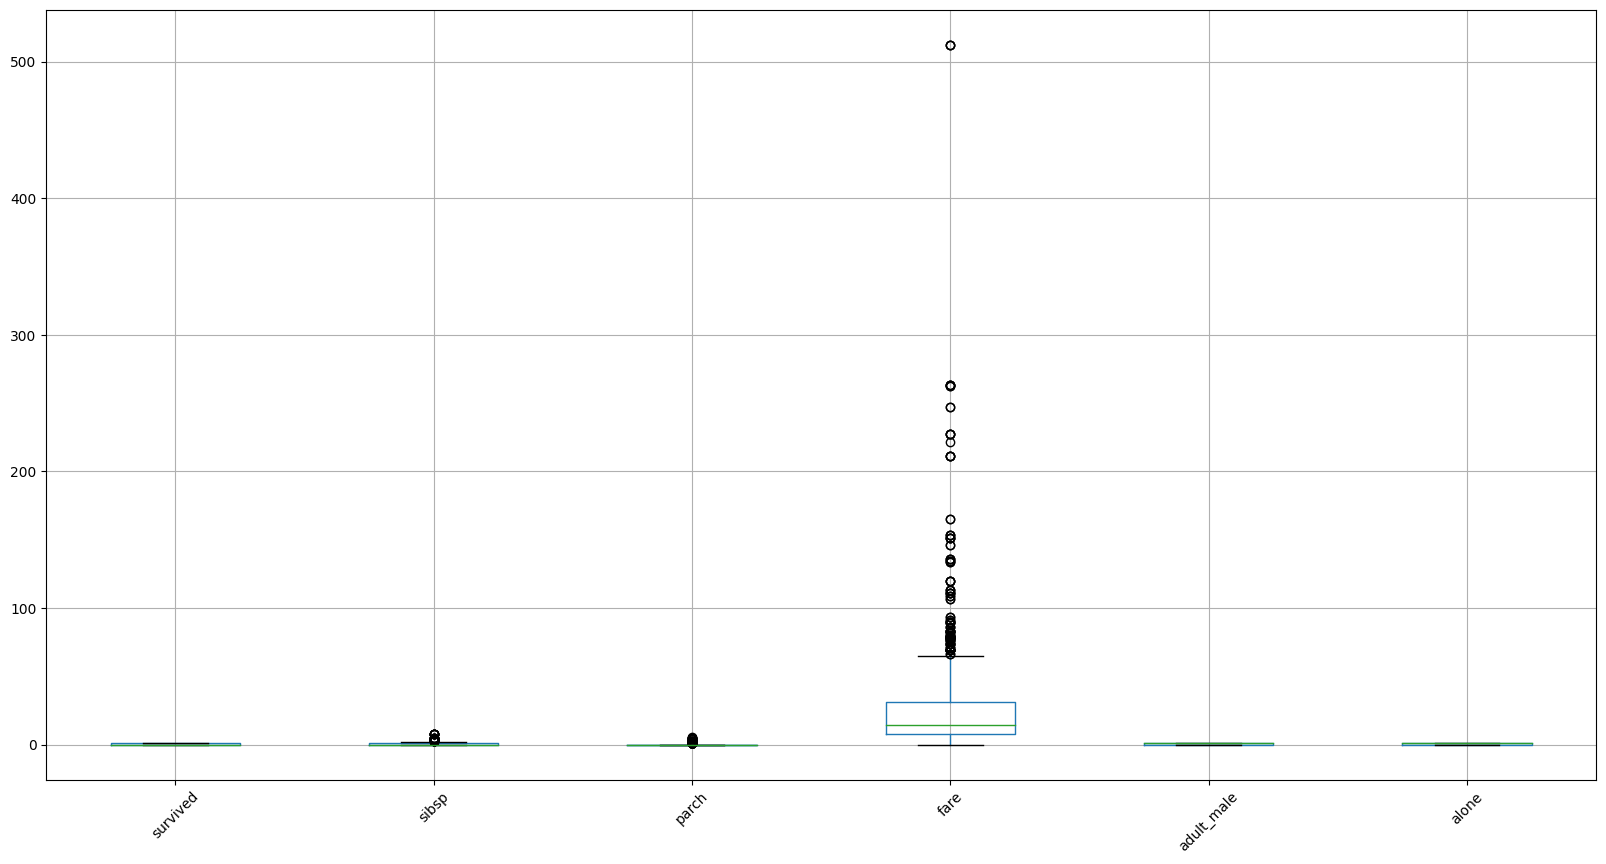

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df is your DataFrame

# Display boxplots for all numeric columns
df.boxplot(figsize=(20, 10))
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.show()


The data has many outliers but they will be kept in the data as they are found valuable.

In [ ]:
df.dtypes

survived         int64
pclass        category
sex           category
sibsp            int64
parch            int64
fare           float64
embarked      category
who           category
adult_male        bool
alone             bool
dtype: object

#Bivariate Analysis

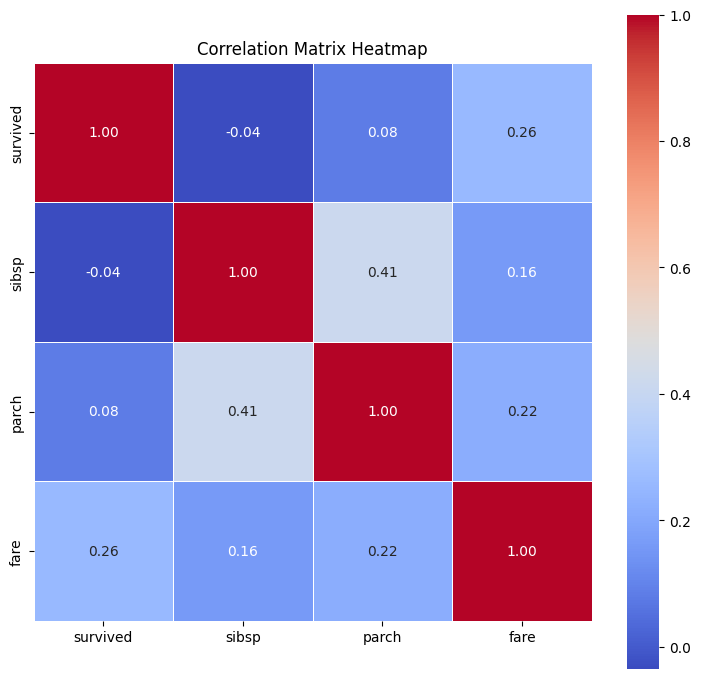

In [ ]:
#Specifying numerical columns

df_box = df.drop(['pclass', 'sex', 'embarked', 'who', 'adult_male', 'alone'], axis=1)

# Calculate the correlation matrix
corr = df_box.corr()

# Generate a heatmap
plt.figure(figsize=(9, 17)) # Adjust the size of the figure as necessary
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True,
            cbar_kws={'shrink': .5}, linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()



####Boxplot Insights

The most interesting found is seeing that there is some correlation between parents and siblings. Which is somewhat plausible, because parents are more likely to have families.

##Multivariate Analysis

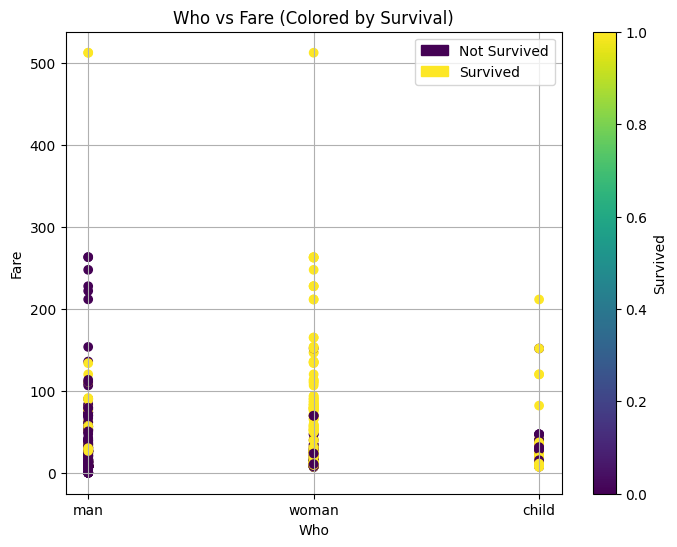

In [ ]:
import matplotlib.patches as mpatches


# Create scatter plot
plt.figure(figsize=(8, 6))
scatter = plt.scatter(df['who'], df['fare'], c=df['survived'], cmap='viridis')
plt.xlabel('Who')
plt.ylabel('Fare')
plt.title('Who vs Fare (Colored by Survival)')
plt.colorbar(label='Survived')
plt.grid(True)

# Create a custom legend
# Define the labels and the colors
labels = ['Not Survived', 'Survived']
colors = [scatter.cmap(scatter.norm(0)), scatter.cmap(scatter.norm(1))]
# Create a list of patches
patches = [mpatches.Patch(color=colors[i], label=labels[i]) for i in range(len(labels))]
# Add the custom legend to the plot
plt.legend(handles=patches)

plt.show()


####Scatterplot insights

From the plot, we can see that a majority of women and children survived but a majority of men did not.

# LogReg Model 1 - 59.2%

In [ ]:
df.dtypes

survived         int64
pclass        category
sex           category
sibsp            int64
parch            int64
fare           float64
embarked      category
who           category
adult_male        bool
alone             bool
dtype: object

columns to be used for Logistic Regression

In [ ]:
df2 = df[['survived', 'sibsp', 'parch']]

In [ ]:

# Split the data into features (X) and target variable (y)
X = df2.drop('survived', axis=1)
y = df2['survived']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the logistic regression model
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.5921787709497207


##Model Evaluation

Accuracy: 0.5921787709497207
Precision: 0.5384615384615384
Recall: 0.0945945945945946
F1 Score: 0.16091954022988506
ROC AUC Score: 0.5287644787644787


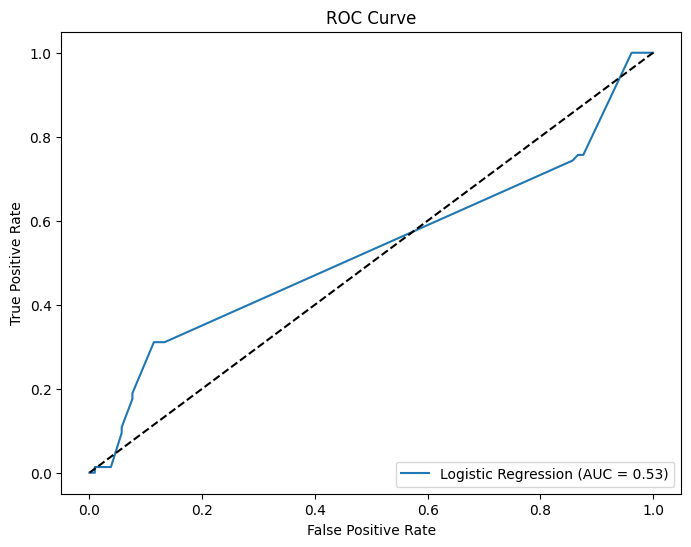

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Assuming the previous steps are already done and you have y_pred ready

# Calculate additional evaluation metrics
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

# Print all evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])

# Plotting ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Dashed diagonal
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


**Accuracy (59.22%)**: The model correctly predicted survival for 59.22% of passengers in the test set. It's a measure of overall correctness.
>
**Precision (53.85%)**: When the model predicted survival, it was correct 53.85% of the time.
>
**Recall (9.46%)**: The model correctly identified 9.46% of all actual survivors.
>
**F1 Score (16.09%)**: Combines precision and recall into a single metric, indicating the model's balance between them is poor.
>
**ROC AUC Score (52.88%)**: The model's ability to distinguish between the survival classes is slightly better than a random guess.

>
**ROC Curve**: Not ideal

#Naive Bayes: Model 2 - 65.3%

In [ ]:
from sklearn.naive_bayes import GaussianNB

# Separate features and target
X = df2.drop('survived', axis=1)
y = df2['survived']

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Gaussian Naive Bayes classifier
gnb = GaussianNB()

# Train the classifier on the training set
gnb.fit(X_train, y_train)

# Make predictions on the test set
y_pred = gnb.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 0.6536312849162011


##Model Evaluation

Accuracy: 0.6536312849162011
Precision: 0.7142857142857143
Recall: 0.2702702702702703
F1 Score: 0.39215686274509803
ROC AUC Score: 0.5462676962676962


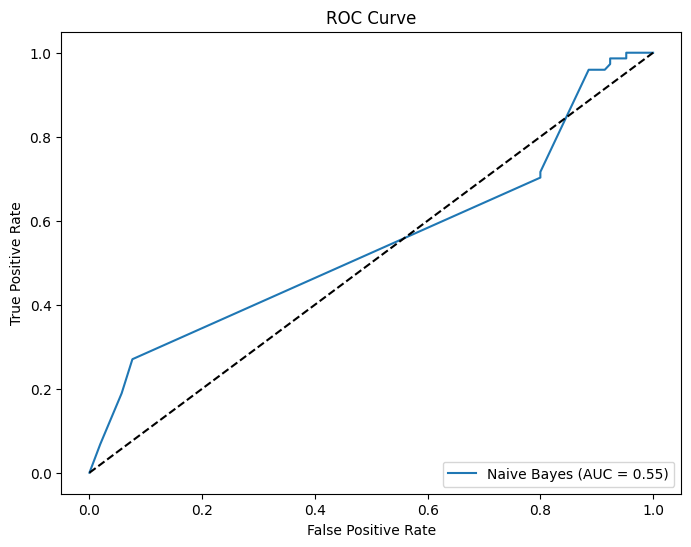

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt


# Calculate additional evaluation metrics
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, gnb.predict_proba(X_test)[:, 1])

# Print all evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, gnb.predict_proba(X_test)[:, 1])

# Plotting ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Naive Bayes (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Dashed diagonal line for reference
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


**Accuracy (0.65):** The model correctly predicts 65% of outcomes, showing moderate overall performance.
>
**Precision (0.71):** When predicting survival, the model is accurate 71% of the time, indicating good reliability in its positive predictions.
>
**Recall (0.27):** Only 27% of actual survivors are identified, suggesting the model misses many true positives.
>
**F1 Score (0.39):** This low score reflects poor balance between precision and recall, indicating the model struggles to accurately predict survivors while minimizing false positives.
>
**ROC AUC Score (0.55):** Barely above random chance, this score reveals the model's limited ability to distinguish between survivors and non-survivors.

# Decision Trees: Model 3 - 64.8%

Accuracy: 0.6480446927374302


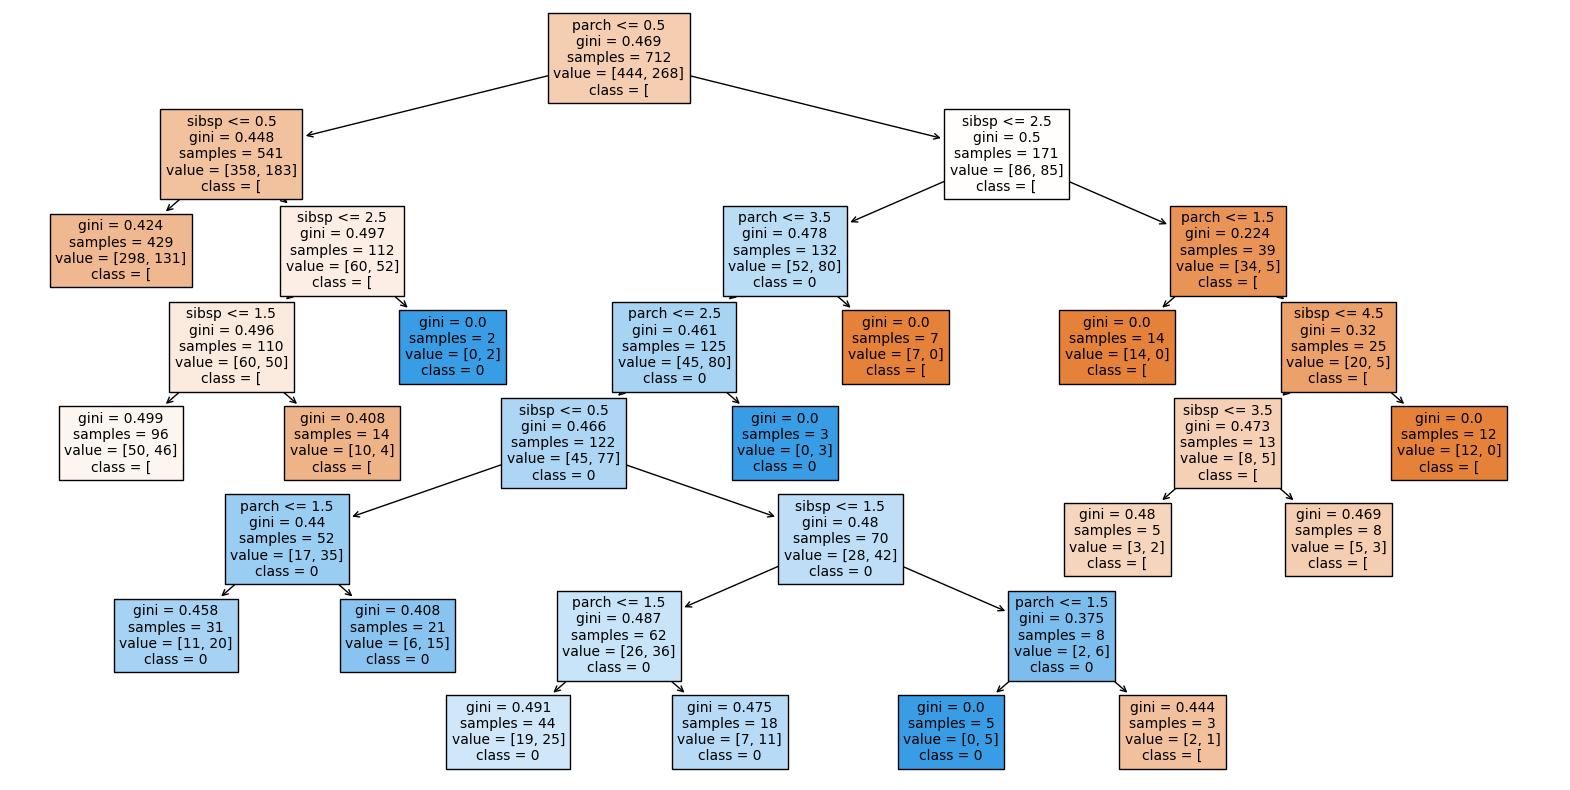

In [ ]:


# Separate features and target
X = df2.drop('survived', axis=1)
y = df2['survived']

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree classifier
df = DecisionTreeClassifier(random_state=42)

# Train the classifier on the training set
df.fit(X_train, y_train)

# Make predictions on the test set
y_pred = df.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

#Visualize the Decision Tree

plt.figure(figsize=(20,10))
plot_tree(df, filled=True, feature_names=X.columns, class_names=str(y.unique()), fontsize=10)
plt.show()


##Model Evaluation

Accuracy: 0.6480446927374302
Precision: 0.6666666666666666
Recall: 0.2972972972972973
F1 Score: 0.4112149532710281
ROC AUC Score: 0.6781853281853281


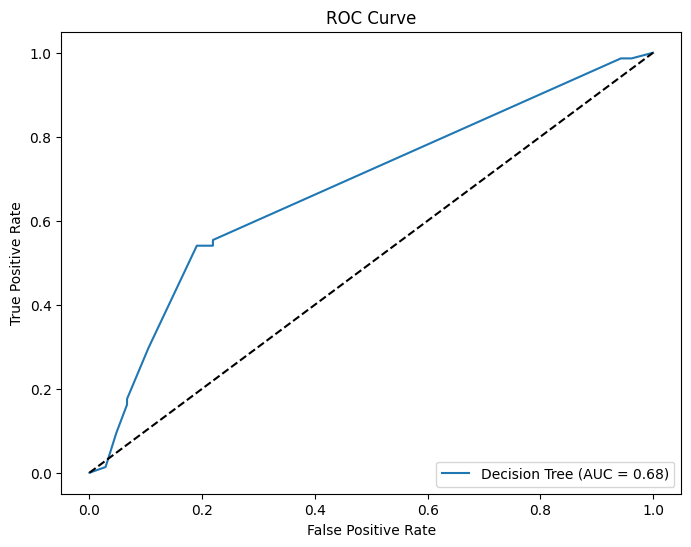

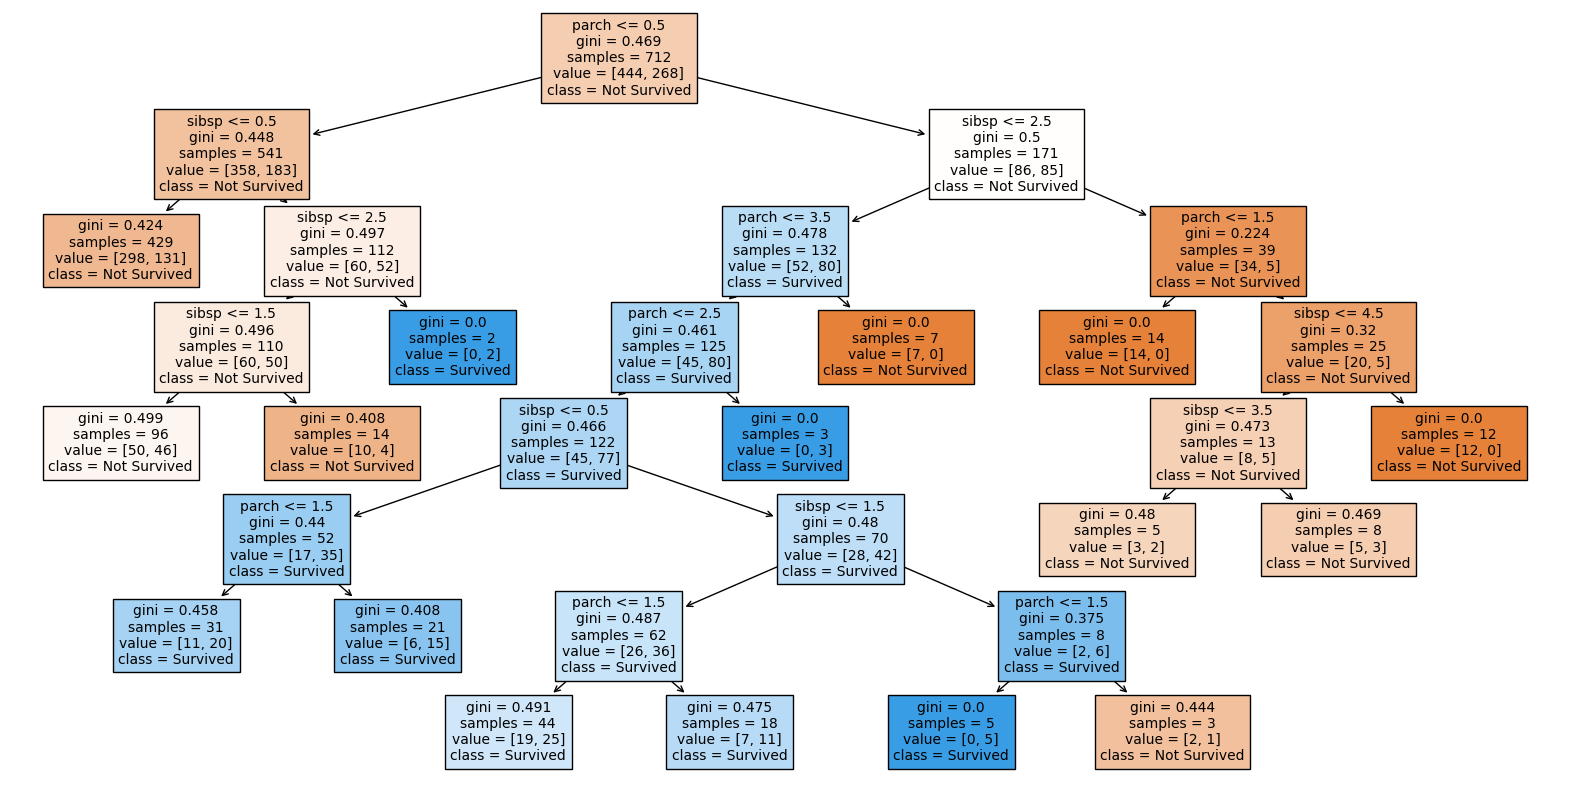

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Assuming the previous steps have been completed and you have your training and test sets ready

# Initialize the Decision Tree classifier
df = DecisionTreeClassifier(random_state=42)

# Train the classifier on the training set
df.fit(X_train, y_train)

# Make predictions on the test set
y_pred = df.predict(X_test)
y_pred_proba = df.predict_proba(X_test)[:, 1]  # Probability estimates for ROC curve

# Evaluate the classifier using various metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Print all evaluation metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"ROC AUC Score: {roc_auc}")

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Plotting ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Decision Tree (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Dashed diagonal
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

# Optional: Visualize the Decision Tree
# Only do this if your tree is not too large, or else the visualization will be cluttered
plt.figure(figsize=(20,10))
plot_tree(df, filled=True, feature_names=X_train.columns, class_names=['Not Survived', 'Survived'], fontsize=10)
plt.show()


**Accuracy (0.65):** The model correctly predicts survival status for 65% of the passengers in the test set.
>

**Precision (0.67):** When the model predicts survival, it is correct 67% of the time.
>
**Recall (0.30):** The model correctly identifies 30% of all actual survivors.
>
**F1 Score (0.41):** A balance between precision and recall, indicating moderate model performance.
>
**ROC AUC Score (0.68):** The model's ability to distinguish between survivors and non-survivors is fair, with a score of 0.68 out of 1.

#Best Model

Our best model is model 2 because it has a higher ROC AUC score.
>
We are going to run a KBest on it to see if we can make it better

In [ ]:
df2.dtypes

survived    int64
sibsp       int64
parch       int64
dtype: object

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score


X = df2.drop('survived', axis=1)
y = df2['survived']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating a pipeline with SelectKBest and DecisionTreeClassifier
pipeline = Pipeline([
    ('select_best', SelectKBest(score_func=chi2, k='all')),  # Use 'k=number_of_features_you_want_to_select' to choose top k features
    ('decision_tree', DecisionTreeClassifier(random_state=42))
])

# Training the pipeline
pipeline.fit(X_train, y_train)

# Making predictions
y_pred = pipeline.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# To see which features were selected and their scores
selected_features = pipeline.named_steps['select_best'].get_support(indices=True)
feature_scores = pipeline.named_steps['select_best'].scores_

print("Selected features:", X.columns[selected_features])
print("Feature scores:", feature_scores)


Accuracy: 0.6480446927374302
Selected features: Index(['sibsp', 'parch'], dtype='object')
Feature scores: [4.02913953 7.20641836]


The model became better because it used less features but achieved the same accuracy